In [51]:
# !pip install leafmap
# ! pip install folium
# !pip install rioxarray
from pystac_client import Client
import leafmap
import folium
import requests
import matplotlib.pyplot as plt
from PIL import Image
import io
import rioxarray


In [3]:
api_url = "https://earth-search.aws.element84.com/v1"
client = Client.open(api_url)
client

<Client id=earth-search-aws>

In [4]:
collections = client.get_collections()
for collection in collections:
    print(collection.id)

sentinel-2-pre-c1-l2a
cop-dem-glo-30
naip
cop-dem-glo-90
landsat-c2-l2
sentinel-2-l2a
sentinel-2-l1c
sentinel-2-c1-l2a
sentinel-1-grd


In [5]:
s1_collection = client.get_collection("sentinel-1-grd")
s1_collection

<CollectionClient id=sentinel-1-grd>

In [12]:
# m = folium.Map(location=[39.905199, 32.231934], zoom_start=12)
# m
m = leafmap.Map(center=[39.9334, 32.8597], zoom=12, height="400px")
m

Map(center=[39.9334, 32.8597], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [13]:
if m.user_rois is not None:
    point = m.user_rois['features'][0]['geometry']
else:
    point = dict(type="Point", coordinates=(39.9334, 32.8597))

In [17]:
search_results = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    max_items=12,
)
print(search_results.matched())


836


In [21]:
items = search_results.item_collection()
print(len(items))
items[0]


12


<Item id=S2B_37SES_20260202_0_L2A>

In [22]:
print(items[0].datetime)


2026-02-02 08:10:49.257000+00:00


In [23]:
print(items[0].geometry)


{'type': 'Polygon', 'coordinates': [[[38.99979558873446, 33.43956604740491], [38.99979785514722, 32.44913781392346], [40.16785660688646, 32.443722765689564], [40.18094672355616, 33.43394314727185], [38.99979558873446, 33.43956604740491]]]}


In [26]:
# geojson = {
# 	"type": "FeatureCollection",
# 	"features": [
# 		{
# 			"type": "Feature",
# 			"geometry": items[0].geometry,
# 			"properties": {},
# 		}
# 	],
# }
# m.add_geojson(geojson)
# m

In [38]:
search = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    datetime="2025-03-03/2026-10-29",
    query=["eo:cloud_cover<5"],
    max_items=10
)

print(search.matched())

items = search.item_collection()
len(items)


67


10

In [40]:
for item in items:
    print(item.properties["eo:cloud_cover"])

items.save_object("search.json")


2.107604
0.002993
2.538674
0.012628
1.084711
0.002269
3e-06
0.015833
0.000368
0.001725


In [43]:
#Let's look at the second item:
selected_item = items[1]

for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue - 10m
cloud: Cloud Probabilities
coastal: Coastal - 60m
granule_metadata: None
green: Green - 10m
nir: NIR 1 - 10m
nir08: NIR 2 - 20m
nir09: NIR 3 - 60m
product_metadata: None
red: Red - 10m
rededge1: Red Edge 1 - 20m
rededge2: Red Edge 2 - 20m
rededge3: Red Edge 3 - 20m
scl: Scene classification map (SCL)
snow: Snow Probabilities
swir16: SWIR 1.6μm - 20m
swir22: SWIR 2.2μm - 20m
tileinfo_metadata: None
visual: True color image
wvp: Water Vapour (WVP)
thumbnail: Thumbnail of preview image
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue - 10m
coastal-jp2: Coastal - 60m
green-jp2: Green - 10m
nir-jp2: NIR 1 - 10m
nir08-jp2: NIR 2 - 20m
nir09-jp2: NIR 3 - 60m
red-jp2: Red - 10m
rededge1-jp2: Red Edge 1 - 20m
rededge2-jp2: Red Edge 2 - 20m
rededge3-jp2: Red Edge 3 - 20m
scl-jp2: Scene classification map (SCL)
swir16-jp2: SWIR 1.6μm - 20m
swir22-jp2: SWIR 2.2μm - 20m
visual-jp2: True color image
wvp-jp2: Water Vapour (WVP)


In [46]:
assets["thumbnail"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/ES/2026/1/S2C_37SES_20260128_0_L2A/preview.jpg'

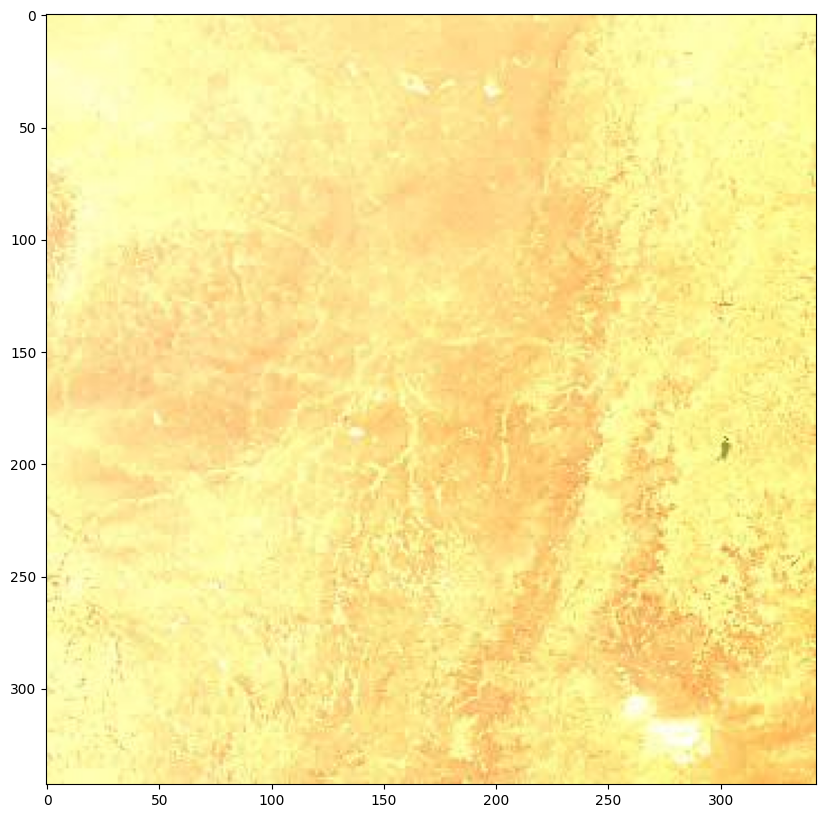

In [48]:
img_data = requests.get(assets["thumbnail"].href).content
plt.figure(figsize=(10, 10))
plt.imshow(Image.open(io.BytesIO(img_data)))

In [52]:
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)
nir

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 3.7e+06 3.7e+06 3.7e+06 ... 3.59e+06 3.59e+06
    spatial_ref  int32 4B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

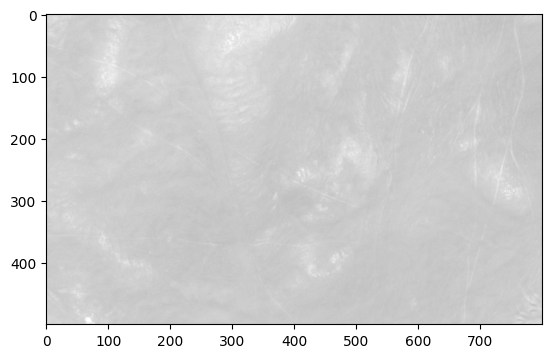

In [53]:
plt.imshow(nir[0,1500:2000,6200:7000], cmap='gray')
plt.clim(vmin=10, vmax=5000)

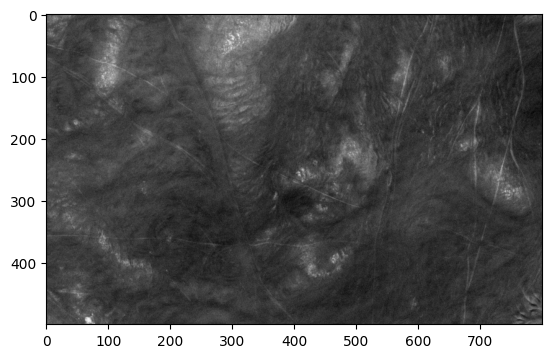

In [54]:
plt.imshow(nir[0,1500:2000,6200:7000], cmap='gray')


In [ ]:
# plt.imshow(nir[0, :, :], cmap='gray')
